<a href="https://colab.research.google.com/github/Bhar8at/DLR/blob/main/radon_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Please upload the zipped folder of CT images


Saving CT_64x64_RESIZED.zip to CT_64x64_RESIZED.zip
✅ Unzipped into: unzipped_ct_images
🔄 Converting 125 images to sinograms...


100%|██████████| 125/125 [00:04<00:00, 26.99it/s]


✅ All sinograms saved in: raw_sinograms


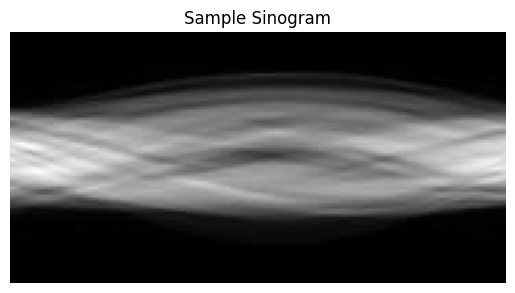

In [2]:
# IMPORTS
import zipfile, os, numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from skimage.transform import radon
from tqdm import tqdm

# UPLOAD AND UNZIP CT IMAGES
print("Please upload the zipped folder of CT images : ")
uploaded = files.upload()
zip_name = next(iter(uploaded))
extract_dir = "unzipped_ct_images"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Unzipped into: {extract_dir}")

# HANDLE NESTED FOLDER
all_subs = os.listdir(extract_dir)
inner_path = os.path.join(extract_dir, all_subs[0]) if len(all_subs) == 1 and os.path.isdir(os.path.join(extract_dir, all_subs[0])) else extract_dir

# CREATE OUTPUT FOLDER
output_dir = "raw_sinograms"
os.makedirs(output_dir, exist_ok=True)

# CONVERT CT IMAGES TO SINOGRAMS
def generate_sinogram(input_path, output_path):
    img = Image.open(input_path).convert('L')
    img_np = np.array(img)
    theta = np.linspace(0., 180., 180, endpoint=False)

    sinogram = radon(img_np, theta=theta, circle=False)

# NORMALIZE AND SAVE AS IMAGE
    sinogram_norm = (255 * (sinogram - np.min(sinogram)) / np.ptp(sinogram)).astype(np.uint8)
    sinogram_img = Image.fromarray(sinogram_norm)
    sinogram_img.save(output_path)

input_files = sorted([
    f for f in os.listdir(inner_path)
    if f.lower().endswith(('.jpg', '.png', '.jpeg')) and not f.startswith("._")
])

print(f"Converting {len(input_files)} images to sinograms...")

# LOOP OVER ALL INPUT FILES
for filename in tqdm(input_files):
    in_path = os.path.join(inner_path, filename)
    out_path = os.path.join(output_dir, filename)
    generate_sinogram(in_path, out_path)

print(f"✅ All sinograms saved in: {output_dir}")

# VISUAL CHECK
sample_path = os.path.join(output_dir, input_files[0])
sample = Image.open(sample_path)
plt.imshow(sample, cmap='gray')
plt.title("Sample Sinogram")
plt.axis("off")
plt.show()


In [3]:
import shutil
from google.colab import files

# ZIP SINOGRAM FOLDER
shutil.make_archive("sinograms_zip", 'zip', "raw_sinograms")

# DOWNLOAD ZIPPED FOLDER
files.download("sinograms_zip.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>